## Problem Statement

1 . This project understands how the Algerian forest Fires occuring

## Data Collection

1. Data Source - https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

## 2.1 Import Data and Required Packages


#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\ss\Downloads\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## 2.2 Data Cleaning

In [4]:
df.loc[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
df.loc[122:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [6]:
## as we can see that row 122 has nan values and 123 has column names so we have to drop it

df.drop([122,123],axis=0, inplace=True)
df.loc[122:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


In [7]:
# replacing string present with float value

df.loc[167,'FWI'] =' 0.1'

# replacing '14.6 9' with '14.69'
df.loc[167, 'DC'] = '14.69'

In [8]:
df.loc[165:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,0.1,NaN
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
169,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [10]:
#### there are some extra spaces in column names

[x for x in df.columns if x.endswith(' ') or x.startswith(' ')]

[' RH', ' Ws', 'Rain ', 'Classes  ']

In [11]:
# Remove extra spaces in column names

df.columns = df.columns.str.strip()

df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [12]:
# Removing extra space in Classes rows

df.Classes = df.Classes.str.strip()

In [13]:
# creating date column

df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [14]:
# dropping day month year column

df.drop(['day','month', 'year'], axis=1, inplace=True)

In [16]:
# creating Region column

df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1
df.loc[120:].head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,2012-09-29,0.0
121,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,2012-09-30,0.0
124,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2012-06-01,1.0
125,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2012-06-02,1.0
126,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2012-06-03,1.0


## 2.2 Dataset information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

## 3. Data Checks to perform

1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

### 3.1 Checking missing Values

In [17]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
date           0
Region         0
dtype: int64

#### we have one missing value in Classes feature

In [18]:
# we can see that we have missing value in "Classes" feature

df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [19]:
### Replace Missing Values with Mode

df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

In [20]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

In [21]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,2012-06-02,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,2012-06-04,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,2012-06-05,0.0


In [22]:
# converting output cariable into 0 and 1

df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

### 3.2 Check Duplicates

In [26]:
df.duplicated().sum()

0

#### No duplicate values in dataset

### 3.3 Check data types

In [27]:
df.dtypes

Temperature            object
RH                     object
Ws                     object
Rain                   object
FFMC                   object
DMC                    object
DC                     object
ISI                    object
BUI                    object
FWI                    object
Classes                 int64
date           datetime64[ns]
Region                float64
dtype: object

In [28]:
# converting datatypes
convert_data = {'date' : 'int64', 'Temperature' : 'int64', 'RH': 'int64', 'Ws': 'int64', 'Rain': 'float64', 'FFMC' : 'float64',
       'DMC' : 'float64', 'DC' : 'float64', 'ISI': 'float64', 'BUI': 'float64', 'FWI' : 'float64', 'Classes': 'int64', 'Region': 'float64'}

df = df.astype(convert_data)

In [29]:
df.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
date             int64
Region         float64
dtype: object

### 3.4 Checking the number of unique values of each column

In [31]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
date           122
Region           2
dtype: int64

### 3.5 Check statistics of data set

In [32]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967,0.565574,1.343736e+18,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505,0.496700,3.049019e+15,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.338509e+18,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,1.341101e+18,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,1.343736e+18,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.346371e+18,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.348963e+18,1.000000


### Insights

1. From the above description of data it is clear clear that maximum temp is 42 degree celsius.
2. Minimum rain is 0 mm.


In [34]:
# categorical features
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feature

[]

In [35]:
for feature in categorical_feature:
    print(df.groupby(feature)['Region'].value_counts())

In [39]:
#list of numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'date', 'Region']


## 4. Graphical analysis

<AxesSubplot:xlabel='Classes', ylabel='count'>

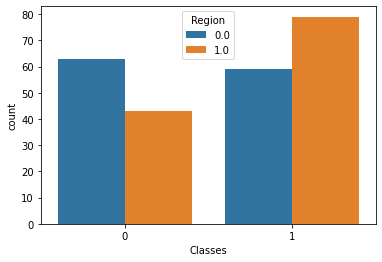

In [37]:
sns.countplot(data=df, x='Classes', hue='Region')

#### Observation
Sidi Bel-abbes region has more occurance of fire than Bejaia region

<AxesSubplot:xlabel='Rain', ylabel='count'>

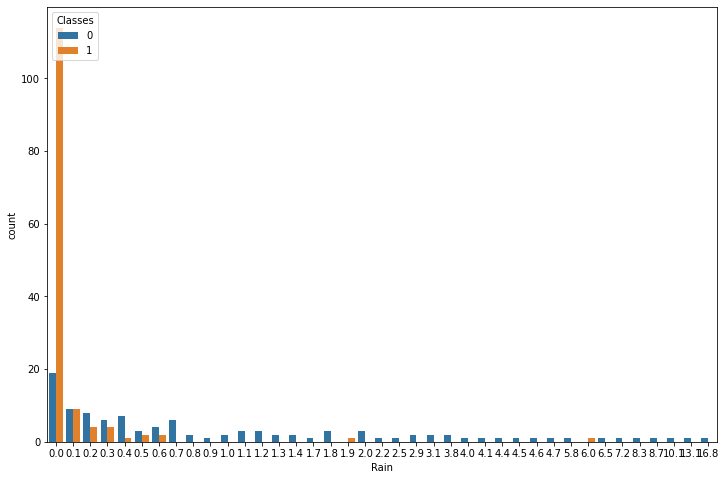

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Rain', hue='Classes')

#### Observation

most of the fires occurs when Rain is 0 mm

<AxesSubplot:xlabel='Temperature', ylabel='count'>

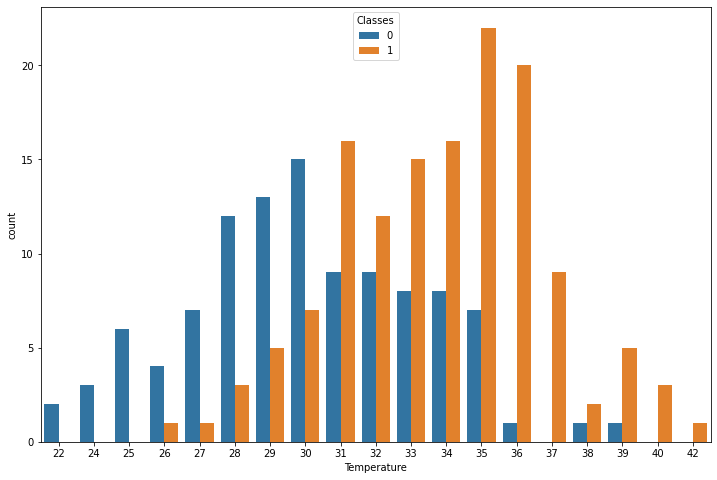

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Temperature', hue='Classes')

#### Observation

most of the fires occurs when temperature is between 30 to 37 degree celsius

<AxesSubplot:xlabel='Ws', ylabel='count'>

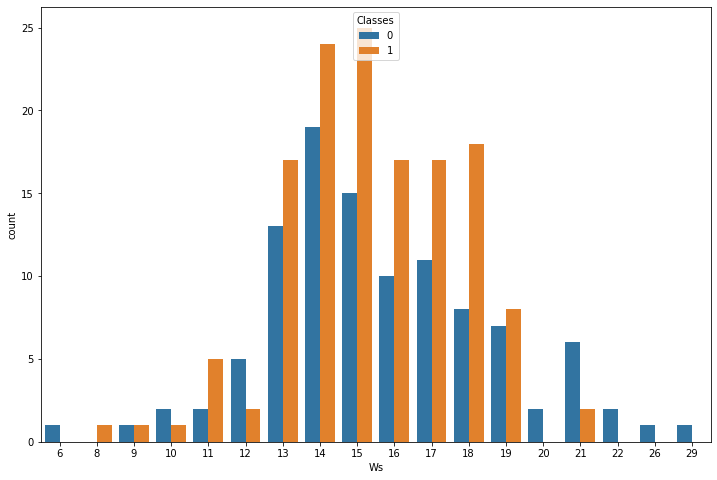

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Ws', hue='Classes')

#### Observation

most of the fires occurs when wind speed  is between 13 to 19 km/h

<AxesSubplot:xlabel='RH', ylabel='count'>

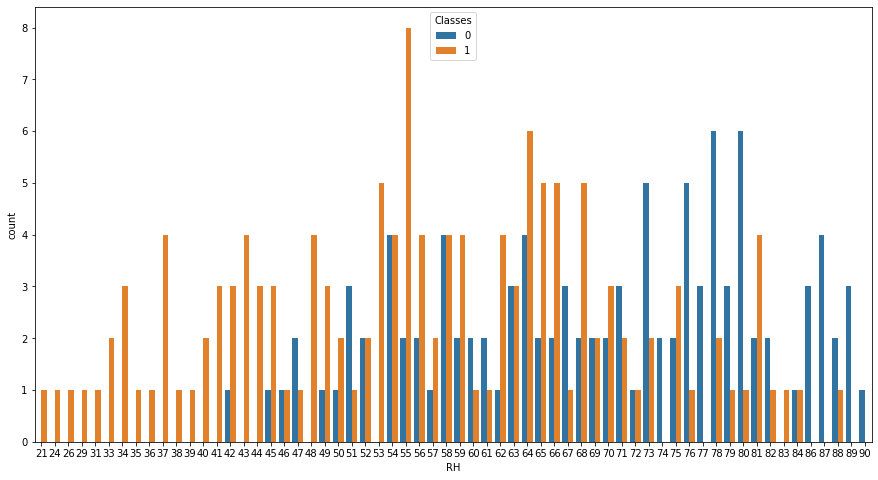

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = 'RH', hue='Classes')

#### Observation

Maximum fires occurs when Relative humidity is between 37 to 70 %

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

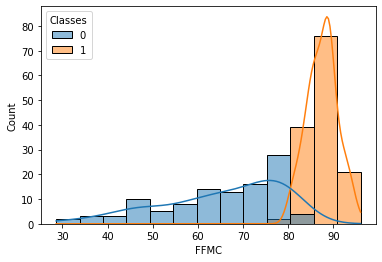

In [52]:
sns.histplot(data=df,x='FFMC',kde=True,hue='Classes')

#### Observation

Based on the distribution we can see that most of the fires occurs when FFMC is between 80 to 90

<AxesSubplot:xlabel='DMC', ylabel='Count'>

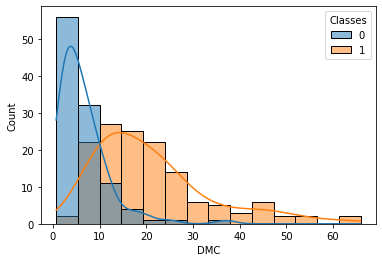

In [53]:
sns.histplot(data=df,x='DMC',kde=True,hue='Classes')

#### Observation

Based on the distribution we can see that most of the fires occurs when DMC is between 10 to 30

<AxesSubplot:xlabel='DC', ylabel='Count'>

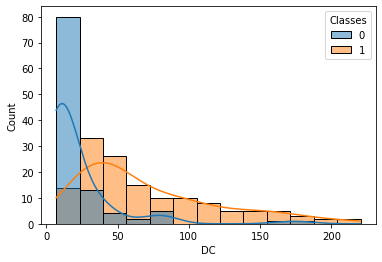

In [54]:
sns.histplot(data=df,x='DC',kde=True,hue='Classes')

#### Observation

Based on the distribution we can see that fires occurs when DC is above 25

<AxesSubplot:xlabel='ISI', ylabel='Count'>

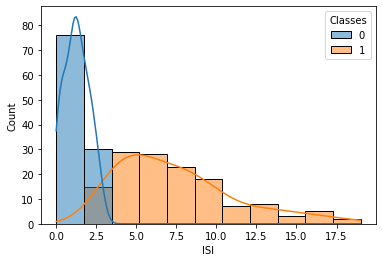

In [55]:
sns.histplot(data=df,x='ISI',kde=True,hue='Classes')

#### observation

Fires occurs when ISI is above 2.5 and below 10

<AxesSubplot:xlabel='BUI', ylabel='Count'>

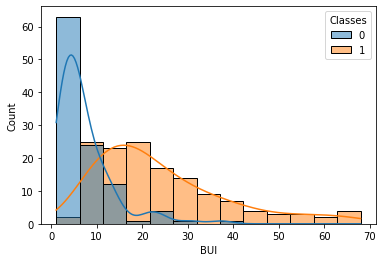

In [56]:
sns.histplot(data=df,x='BUI',kde=True,hue='Classes')

#### Observation

Most of the fires occurs when BUI is between 10 and 40

<AxesSubplot:xlabel='FWI', ylabel='Count'>

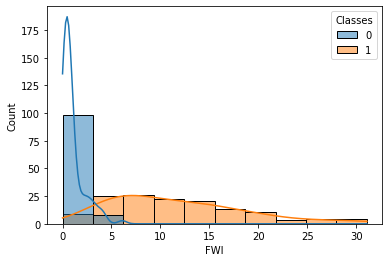

In [57]:
sns.histplot(data=df,x='FWI',kde=True,hue='Classes')

#### Observation

Most of the fires occurs when BUI is between 5 and 25

## Outlier handling

### Rain outliers

Text(0.5, 1.0, 'Boxplot')

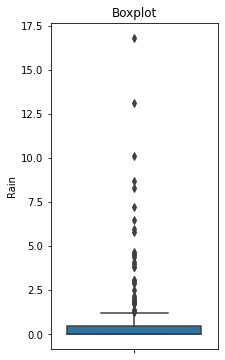

In [74]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['Rain'])
plt.title('Boxplot')

In [75]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
    return upper_boundary, lower_boundary

In [76]:
upper_boundary, lower_boundary = find_boundaries(df, 'Rain', 1.5)
upper_boundary, lower_boundary

(1.25, -0.75)

In [79]:
outliers = np.where(df['Rain'] > upper_boundary, True, np.where(df['Rain'] < lower_boundary, True, False))

In [81]:
outliers_df = df.loc[outliers, 'Rain']
outliers_df.head()

1      1.3
2     13.1
3      2.5
14     3.1
38     1.4
Name: Rain, dtype: float64

#### remove the outliers from the dataset

In [84]:
df_trimed= df.loc[~outliers, 'Rain']

In [86]:
df_trimed

0      0.0
4      0.0
5      0.0
6      0.0
7      0.0
      ... 
240    0.0
241    0.0
243    0.5
244    0.1
245    0.2
Name: Rain, Length: 209, dtype: float64

In [88]:
df['Rain'] = df_trimed

Text(0.5, 1.0, 'Boxplot')

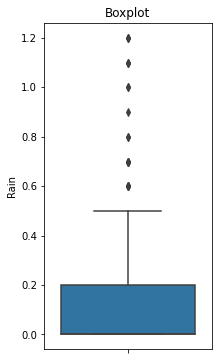

In [90]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['Rain'])
plt.title('Boxplot')

#### After trimming outliers

### BUI Outliers

Text(0.5, 1.0, 'Boxplot')

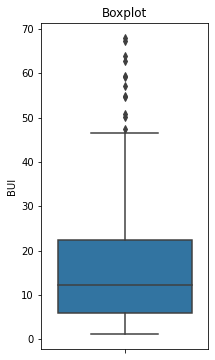

In [91]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['BUI'])
plt.title('Boxplot')

In [92]:
# upper and lower boundary

upper_boundary, lower_boundary = find_boundaries(df, 'BUI', 1.5)
upper_boundary, lower_boundary

(47.3125, -18.787499999999998)

In [93]:
outliers = np.where(df['BUI'] > upper_boundary, True, np.where(df['BUI'] < lower_boundary, True, False))

In [94]:
outliers_df = df.loc[outliers, 'BUI']
outliers_df.head()

83    47.5
84    50.9
85    54.7
86    57.1
87    59.3
Name: BUI, dtype: float64

#### remove the outliers from the dataset

In [95]:
df_trimed= df.loc[~outliers, 'BUI']
df_trimed.head()

0    3.4
1    3.9
2    2.7
3    1.7
4    3.9
Name: BUI, dtype: float64

In [96]:
df['BUI'] = df_trimed

Text(0.5, 1.0, 'Boxplot')

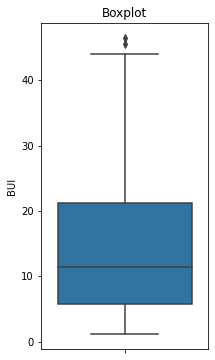

In [97]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['BUI'])
plt.title('Boxplot')

#### After trimming the outliers

### Ws outliers

Text(0.5, 1.0, 'Boxplot')

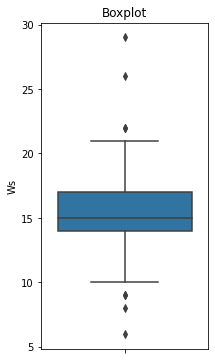

In [101]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['Ws'])
plt.title('Boxplot')

In [102]:
# upper and lower boundary

upper_boundary, lower_boundary = find_boundaries(df, 'Ws', 1.5)
upper_boundary, lower_boundary

(21.5, 9.5)

In [103]:
outliers = np.where(df['Ws'] > upper_boundary, True, np.where(df['Ws'] < lower_boundary, True, False))

In [104]:
outliers_df = df.loc[outliers, 'Ws']
outliers_df.head()

2      22
52     22
105    26
178     9
201     9
Name: Ws, dtype: int64

#### remove the outliers from the Ws

In [105]:
df_trimed= df.loc[~outliers, 'Ws']
df_trimed.head()

0    18
1    13
3    13
4    16
5    14
Name: Ws, dtype: int64

In [106]:
df['Ws'] = df_trimed

Text(0.5, 1.0, 'Boxplot')

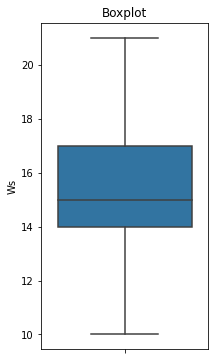

In [107]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['Ws'])
plt.title('Boxplot')

#### After trimming the outliers

### FFMC outliers

Text(0.5, 1.0, 'Boxplot')

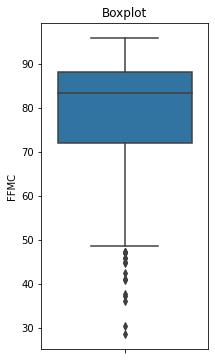

In [109]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['FFMC'])
plt.title('Boxplot')

In [110]:
# upper and lower boundary

upper_boundary, lower_boundary = find_boundaries(df, 'FFMC', 1.5)
upper_boundary, lower_boundary

(112.63749999999999, 47.73750000000001)

In [112]:
# Outliers

outliers = np.where(df['FFMC'] > upper_boundary, True, np.where(df['FFMC'] < lower_boundary, True, False))

In [113]:
outliers_df = df.loc[outliers, 'FFMC']
outliers_df.head()

2     47.1
3     28.6
15    36.1
16    37.3
92    46.0
Name: FFMC, dtype: float64

#### remove the outliers from the FFMC

In [114]:
df_trimed= df.loc[~outliers, 'FFMC']
df_trimed.head()

0    65.7
1    64.4
4    64.8
5    82.6
6    88.2
Name: FFMC, dtype: float64

In [115]:
df['FFMC'] = df_trimed

Text(0.5, 1.0, 'Boxplot')

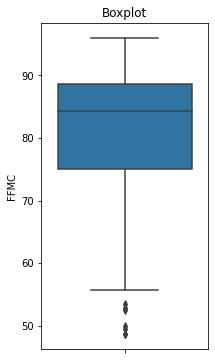

In [116]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['FFMC'])
plt.title('Boxplot')

### DMC Outliers

Text(0.5, 1.0, 'Boxplot')

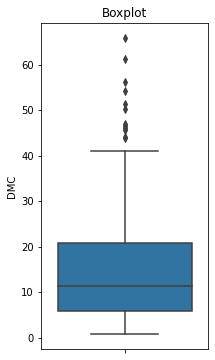

In [118]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['DMC'])
plt.title('Boxplot')

In [119]:
# upper and lower boundary

upper_boundary, lower_boundary = find_boundaries(df, 'DMC', 1.5)
upper_boundary, lower_boundary

(43.175, -16.624999999999996)

In [120]:
# Outliers

outliers = np.where(df['DMC'] > upper_boundary, True, np.where(df['DMC'] < lower_boundary, True, False))

In [122]:
outliers_df = df.loc[outliers, 'DMC']
outliers_df.head()

85    43.9
86    45.6
87    47.0
88    50.2
89    54.2
Name: DMC, dtype: float64

#### remove the outliers from the DMC

In [123]:
df_trimed= df.loc[~outliers, 'DMC']
df_trimed.head()

0    3.4
1    4.1
2    2.5
3    1.3
4    3.0
Name: DMC, dtype: float64

In [124]:
df['DMC'] = df_trimed

Text(0.5, 1.0, 'Boxplot')

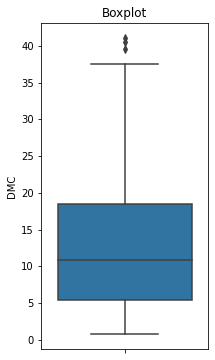

In [125]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['DMC'])
plt.title('Boxplot')

In [126]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'date', 'Region'],
      dtype='object')

### DC Outliers

Text(0.5, 1.0, 'Boxplot')

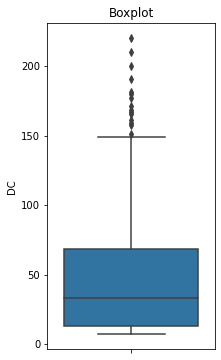

In [127]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['DC'])
plt.title('Boxplot')

In [128]:
# upper and lower boundary

upper_boundary, lower_boundary = find_boundaries(df, 'DC', 1.5)
upper_boundary, lower_boundary

(150.46250000000003, -69.03750000000002)

In [129]:
# Outliers

outliers = np.where(df['DC'] > upper_boundary, True, np.where(df['DC'] < lower_boundary, True, False))

In [130]:
outliers_df = df.loc[outliers, 'DC']
outliers_df.head()

82    151.3
83    161.5
84    171.3
85    181.3
86    190.6
Name: DC, dtype: float64

#### remove the outliers from the DC

In [131]:
df_trimed= df.loc[~outliers, 'DC']
df_trimed.head()

0     7.6
1     7.6
2     7.1
3     6.9
4    14.2
Name: DC, dtype: float64

In [132]:
df['DC'] = df_trimed

Text(0.5, 1.0, 'Boxplot')

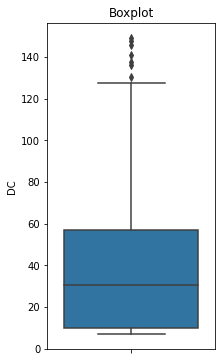

In [133]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['DC'])
plt.title('Boxplot')

### ISI Outliers

Text(0.5, 1.0, 'Boxplot')

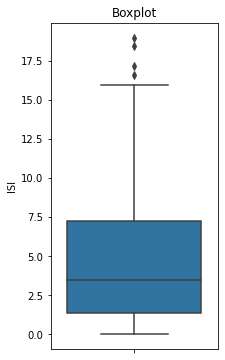

In [134]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['ISI'])
plt.title('Boxplot')

In [135]:
# upper and lower boundary

upper_boundary, lower_boundary = find_boundaries(df, 'ISI', 1.5)
upper_boundary, lower_boundary

(16.150000000000002, -7.450000000000001)

In [136]:
# Outliers

outliers = np.where(df['ISI'] > upper_boundary, True, np.where(df['ISI'] < lower_boundary, True, False))

In [137]:
outliers_df = df.loc[outliers, 'ISI']
outliers_df.head()

174    18.5
187    17.2
189    19.0
195    16.6
Name: ISI, dtype: float64

#### remove the Outliers from ISI

In [138]:
df_trimed= df.loc[~outliers, 'ISI']
df_trimed.head()

0    1.3
1    1.0
2    0.3
3    0.0
4    1.2
Name: ISI, dtype: float64

In [139]:
df['ISI'] = df_trimed

Text(0.5, 1.0, 'Boxplot')

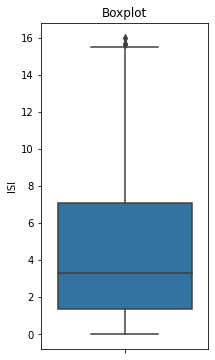

In [140]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['ISI'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

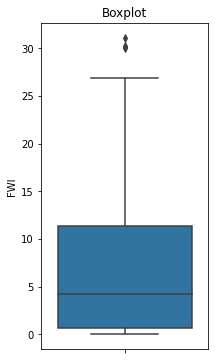

In [141]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df['FWI'])
plt.title('Boxplot')

In [142]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1338508800000000000,0.0
1,29,61,13.0,NaN,64.4,4.1,7.6,1.0,3.9,0.4,0,1338595200000000000,0.0
2,26,82,NaN,NaN,NaN,2.5,7.1,0.3,2.7,0.1,0,1338681600000000000,0.0
3,25,89,13.0,NaN,NaN,1.3,6.9,0.0,1.7,0.0,0,1338768000000000000,0.0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1338854400000000000,0.0


In [144]:
df.dtypes

Temperature      int64
RH               int64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
date             int64
Region         float64
dtype: object

In [149]:
df.isnull().sum()

Temperature     0
RH              0
Ws              8
Rain           35
FFMC           16
DMC            12
DC             15
ISI             4
BUI            12
FWI             0
Classes         0
date            0
Region          0
dtype: int64

### first let's make a copy of dataset

In [159]:
df_copy = df

In [160]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1338508800000000000,0.0
1,29,61,13.0,NaN,64.4,4.1,7.6,1.0,3.9,0.4,0,1338595200000000000,0.0
2,26,82,NaN,NaN,NaN,2.5,7.1,0.3,2.7,0.1,0,1338681600000000000,0.0
3,25,89,13.0,NaN,NaN,1.3,6.9,0.0,1.7,0.0,0,1338768000000000000,0.0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1338854400000000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1348617600000000000,1.0
242,28,87,15.0,NaN,NaN,6.5,8.0,0.1,6.2,0.0,0,1348704000000000000,1.0
243,27,87,NaN,0.5,NaN,3.5,7.9,0.4,3.4,0.2,0,1348790400000000000,1.0
244,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1348876800000000000,1.0


In [161]:
df_copy.fillna(df_copy.mean().round(1), inplace=True)

In [162]:
df_copy.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

In [163]:
X = df_copy.drop(columns=['Classes'])
y = df_copy['Classes']

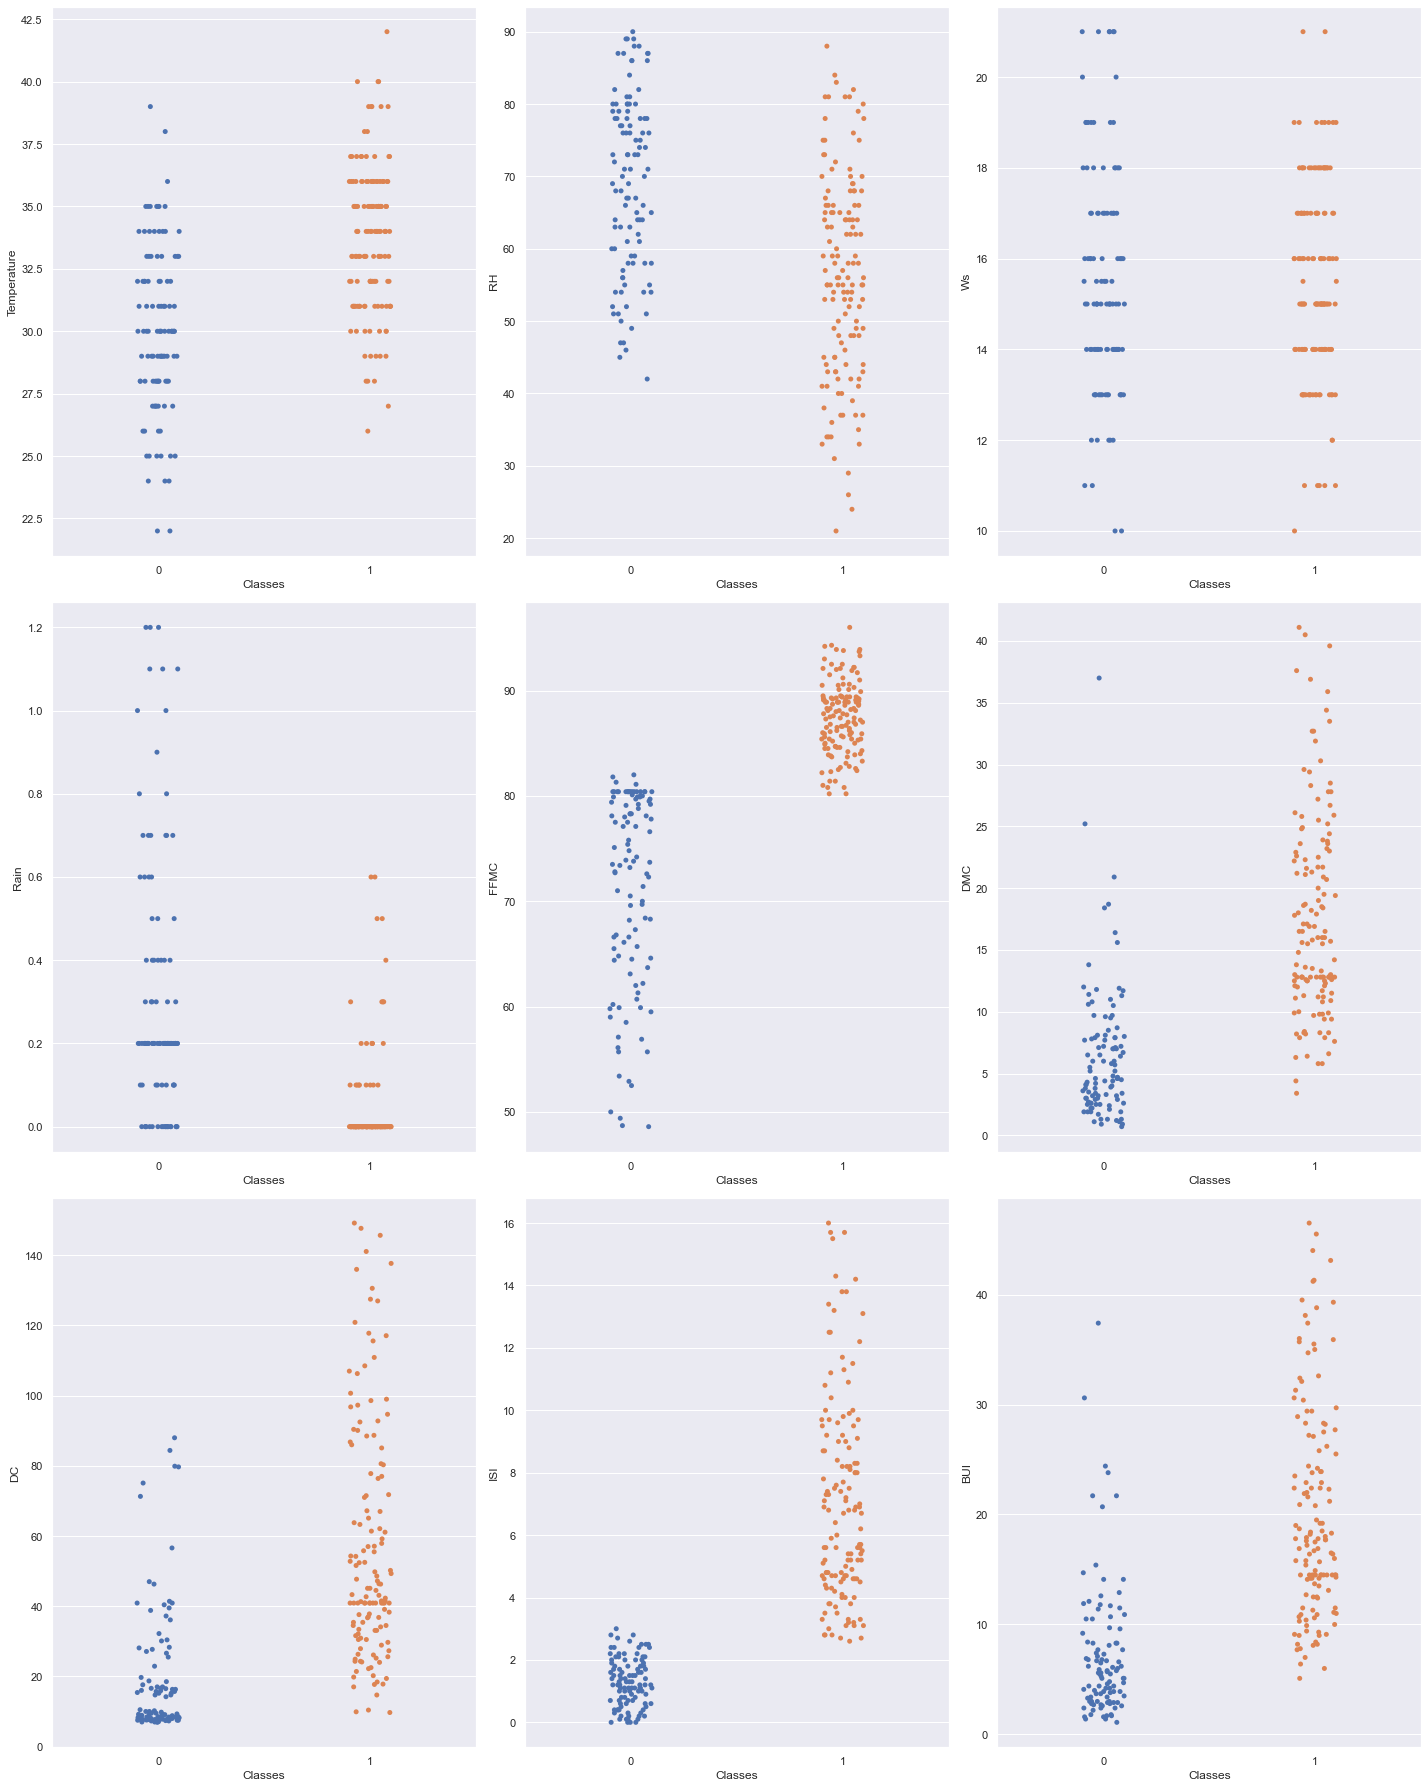

In [164]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [165]:
# importing sklearn

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [166]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [167]:
X_scaled

array([[-0.87473544, -0.33247844,  1.08920316, ..., -0.87656628,
        -1.71791138, -1.        ],
       [-0.87473544, -0.0631847 , -1.06798492, ..., -0.89003748,
        -1.68951615, -1.        ],
       [-1.70200461,  1.35060746,  0.01060912, ..., -0.93045106,
        -1.66112092, -1.        ],
       ...,
       [-1.42624822,  1.68722464,  0.01060912, ..., -0.91697987,
         1.66112092,  1.        ],
       [-2.25351739, -0.53444875,  1.08920316, ..., -0.84962389,
         1.68951615,  1.        ],
       [-2.25351739,  0.13878561, -0.20510969, ..., -0.87656628,
         1.71791138,  1.        ]])

In [168]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,2.369443,Temperature
1,2.536721,RH
2,1.232758,Ws
3,1.672169,Rain
4,3.015554,FFMC
5,6.641173,DMC
6,3.914253,DC
7,6.393014,ISI
8,9.257605,BUI
9,6.305686,FWI


- VIF equal to 1 = variables are not correlated
- VIF between 1 and 5 = variables are moderately correlated 
- VIF greater than 5 = variables are highly correlated

In [170]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [171]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [172]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [173]:
y_pred = log_reg.predict(x_test)

In [174]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9508196721311475

In [175]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27,  0],
       [ 3, 31]], dtype=int64)

In [176]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [177]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9508196721311475

In [178]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [180]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9

In [181]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9473684210526316

In [182]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9558823529411764